# Training symbolic regression models

This notebook illustrates how to use scripts developed to train symbolic regression models. 

For more information refer to the main manuscript //// (paper link)

The following examples were run with the following dependencies:

numpy == 1.22.3 pandas == 1.4.3  scikit-learn == 1.0.2  scipy == 1.7.1 

torch ==1.9.0 wandb == 0.12.21 pytorch == 1.12.0 sympy == 1.10.1 




In [1]:
import sys
sys.path.insert(0, '../src')

import numpy as np
import roboscientist.equation.equation as rs_equation
from experiments import run_experiment


import roboscientist.equation.operators as rs_operators

import matplotlib.pyplot as plt

# Training data

For this example, we generate artificial training data from an arbitrarily chosen expression. In your application, however, you will replace this cell for a function opening an existing dataset from, e.g. a pickle file, or a csv.


In [2]:
# Generate equaly destributed points from -5 to 5
X = np.sort(np.sort(np.random.uniform(-5, 5, 25)))[..., None]

# The turget function

y = X ** 3 + X ** 2 + X 

# You can add nise to the turget, if you like

#noise = 1e-3 * np.random.rand(*X.shape)
#y = X ** 3 + X ** 2 + X + noise



# Setting solver hyperparameters

The next cell presented an example of a simple run where you only choose the epoch number.

In run_experiment.py you can find a set of hyperparameters (with default values) that you can tune to fit your data.

One more important 'parameter' is a set of functions with you want to use to fit your dataset.

The default functions a listed in operators.py

Login to your wandb account


In [3]:
x_lows = [X.min(axis=0)]
x_highs = [X.max(axis=0)]
y_dom = (y.min() - 0.05 * y.min(), y.max() + 0.05 * y.max())
domains_grid = (x_lows, x_highs, y_dom)

In [4]:
# This cell runs the experiment

# domains=domains_grid,true_formula=rs_equation.Equation(['5'])  somehow not working wothout this.....

solver = run_experiment(X, y, epochs=10,domains=domains_grid,true_formula=rs_equation.Equation(['5']))

wandb: Currently logged in as: mikelazarev. Use `wandb login --relogin` to force relogin


===== START PRETRAIN =====
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 17.554, rec loss: 17.459, kl: 0.189
	[validation] loss: 14.651, rec loss: 14.463, kl: 0.377
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 15.461, rec loss: 15.152, kl: 0.619
	[validation] loss: 14.265, rec loss: 13.836, kl: 0.859
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 15.106, rec loss: 14.545, kl: 1.120
	[validation] loss: 14.016, rec loss: 13.346, kl: 1.341
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 14.866, rec loss: 14.031, kl: 1.670
	[validation] loss: 13.789, rec loss: 12.828, kl: 1.924
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 14.633, rec loss: 13.515, kl: 2.235
	[validation] loss: 13.529, rec loss: 12.281, kl: 2.496
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 14.380, rec loss: 12.943, kl: 2.874
	[validation] loss: 13.358, rec loss: 11.797, kl: 3.122
	 [epoch -1]
	[training] batches count: 157
	[tra

	 [epoch -1]
	[training] batches count: 157
	[training] loss: 11.483, rec loss: 5.977, kl: 11.011
	[validation] loss: 10.443, rec loss: 5.006, kl: 10.875
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 11.527, rec loss: 6.012, kl: 11.030
	[validation] loss: 10.426, rec loss: 4.977, kl: 10.900
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 11.360, rec loss: 5.763, kl: 11.194
	[validation] loss: 10.280, rec loss: 4.784, kl: 10.994
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 11.412, rec loss: 5.759, kl: 11.306
	[validation] loss: 10.545, rec loss: 5.072, kl: 10.946
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 11.333, rec loss: 5.654, kl: 11.358
	[validation] loss: 10.874, rec loss: 5.370, kl: 11.008
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 11.327, rec loss: 5.643, kl: 11.368
	[validation] loss: 10.161, rec loss: 4.523, kl: 11.275
	 [epoch -1]
	[training] batches count: 157
	[training] loss: 11.291, rec lo

# SEGVAE output

Next cell prints the 'best' formulas (smallest mse)

More details and Pareto front you may find in your wandb account

In [5]:
best_idx = np.argmin(solver.stats.last_n_best_mses)
equations = np.array(solver.stats.last_n_best_formulas)
eq = rs_equation.Equation(equations[best_idx].split())

print('Raw equation in prefix notation: ', equations[best_idx])
print('Equation in traditional notation: ', eq.repr())

Raw equation in prefix notation:  mul x1 add mul x1 x1 x1
Equation in traditional notation:  (x1 * ((x1 * x1) + x1))


In [15]:
np.linspace(x_lows, x_highs).reshape(-1)

array([-4.64824343, -4.45283729, -4.25743114, -4.062025  , -3.86661885,
       -3.67121271, -3.47580656, -3.28040042, -3.08499427, -2.88958813,
       -2.69418198, -2.49877584, -2.30336969, -2.10796355, -1.9125574 ,
       -1.71715126, -1.52174511, -1.32633897, -1.13093282, -0.93552668,
       -0.74012053, -0.54471439, -0.34930824, -0.1539021 ,  0.04150405,
        0.23691019,  0.43231634,  0.62772248,  0.82312863,  1.01853477,
        1.21394092,  1.40934706,  1.60475321,  1.80015935,  1.9955655 ,
        2.19097164,  2.38637779,  2.58178393,  2.77719008,  2.97259622,
        3.16800237,  3.36340851,  3.55881466,  3.7542208 ,  3.94962695,
        4.14503309,  4.34043924,  4.53584538,  4.73125153,  4.92665767])

Text(0.5, 1.0, 'S_S_deffects')

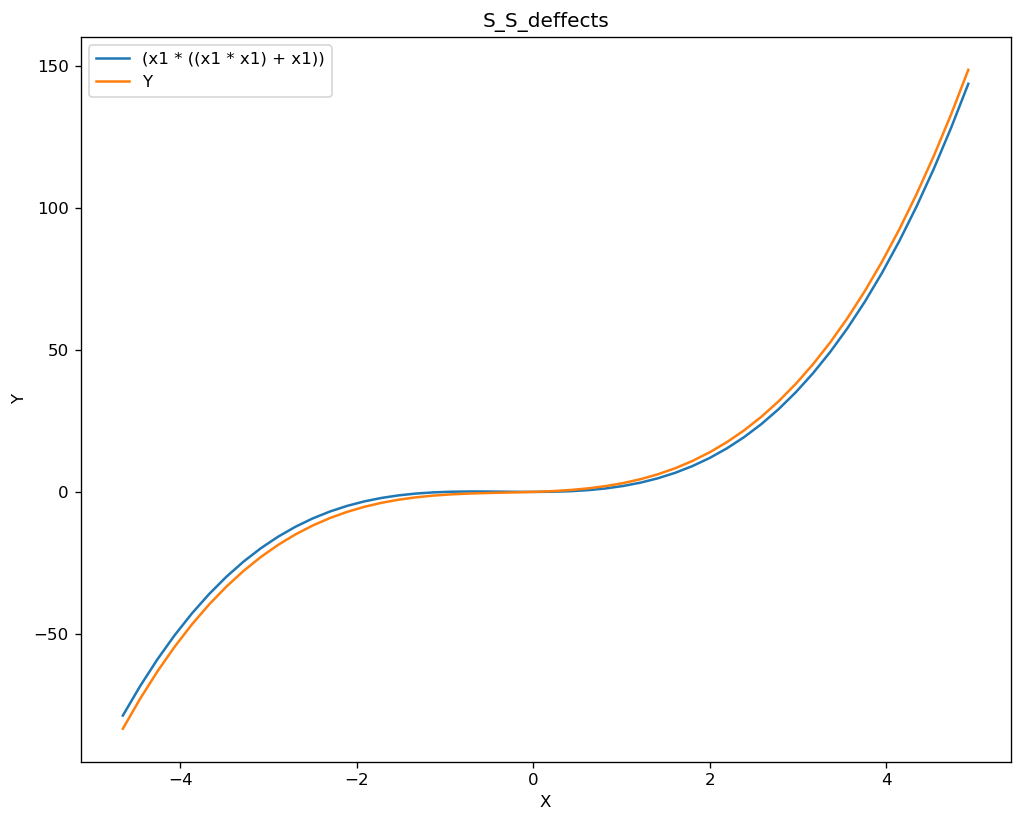

In [31]:
# plot generated formula (best)

fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

x1 = np.linspace(x_lows, x_highs).reshape(-1)

# best generated formula
equation = eval(eq.repr())
                
plt.plot(x1,equation,label=eq.repr())

# ground truth
y = x1 ** 3 + x1 ** 2 + x1 

plt.plot(x1,y,label='Y')
plt.legend(loc="upper left")
ax.set_ylabel('Y'),
ax.set_xlabel('X')
ax.set_title('Fit_example')


# How to use predicates

The main function is a predicate() where you can set any conditions on the acceptance criteria of generated functions.

In the following cell, we set two conditions.

First, the generated formula has to have x1 token.

Second, we exclude any possible combinations of nested functions with 'exp' 'pow' 'cos' tokens.



In [ ]:
# gives offsprings of a given token in list_of_tokens

def get_offsprings(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    traversal = []
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        traversal.append(token)
        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1

    return traversal

def predicate(list_of_tokens, chek = False):

    if 'x1'  not in list_of_tokens :
        return False


    for i, token in enumerate(list_of_tokens):
        offsprings = get_offsprings(list_of_tokens, i)      
        if  token == 'exp'   or token == 'pow' or token == 'cos' :
            if  'exp'  in offsprings  or 'pow' in offsprings or 'cos' in offsprings  :

                return False
           
            
            
    return True

# Set the domain for values and targets.

In [ ]:
x_lows = [Dataset.min(axis=0)]
x_highs = [Dataset.max(axis=0)]
y_dom = (Dy.min()-0.005, Dy.max()+0.005)
domains_grid = (x_lows, x_highs, y_dom)

print(x_lows, x_highs, y_dom)

Dataset=Dataset.reshape(-1,1)

# Hyperparameters tunning


* functions <- functions or operators token list (see operators.py for more details)
        
* free_variables <- free variables token list
        
* wandb_proj <-  wandb project name
        
* project_name <- specify our run name for wandb
        
* constants <- list of constants
        
* float_constants <- list of float constants, for mo details see operators.py
        
* epochs <- the number of epoch in the training loop
        
* n_formulas_to_sample <- maximum number of formulas to be sampled from VAE
               
* max_formula_length <- maximum complexity of generated formulas (recomended to use less if posible)

* formula_predicate  <- predicate usage, specified in cell above

* latent <- VAE latent space dimension (128 by default)

* lstm_hidden_dim  <- LSTM hidden dimension (64 by default)

* device <- cuda by default if you want to use your GPU

* train_size <- number of generated formulas in pretrain step

* log_intermediate_steps <- if you need to store logs True (by default) 

* domains <- target and value domain, by default min(arrgs) max(arrgs)

* simplification <- formula simplification by simply library (see details in the paper) (by default False)

* pretrain_path <- path to the specific list of pretrained formulas  (by default None)



In [ ]:
solver = run_experiment(Dataset, Dy,
        functions=['add', 'sub', 'mul', 'div','pow2','cos','exp','pow'],
        free_variables=['x1'],
        wandb_proj='SEGVAE',
        project_name='SEGVAE_Hiperparameters_Tunning',
        constants=[],
        float_constants=rs_operators.FLOAT_CONST + rs_operators.INT_CONST,
        epochs=1200,
        n_formulas_to_sample=5000,
        max_formula_length=25,
        formula_predicate=predicate,
#        true_formula=rs_equation.Equation(['5']),
        latent=128,
        lstm_hidden_dim=64,
        device='cuda',
        train_size=50000,
        log_intermediate_steps=True,
        domains=domains_grid,
        simplification=False,
        pretrain_path=None)

In [ ]:
best_idx = np.argmin(solver.stats.last_n_best_mses)
equations = np.array(solver.stats.last_n_best_formulas)
eq = rs_equation.Equation(equations[best_idx].split())

print('Raw equation in prefix notation: ', equations[best_idx])
print('Equation in traditional notation: ', eq.repr())